# 01 - XFOIL Validation

Validate XFOIL integration against published data.

In [1]:
import sys
sys.path.append('..')

import numpy as np
import matplotlib.pyplot as plt
from src.aerodynamics.xfoil_interface import get_analyzer
from src.aerodynamics.airfoil_gen import naca4

## NACA 2412 Validation

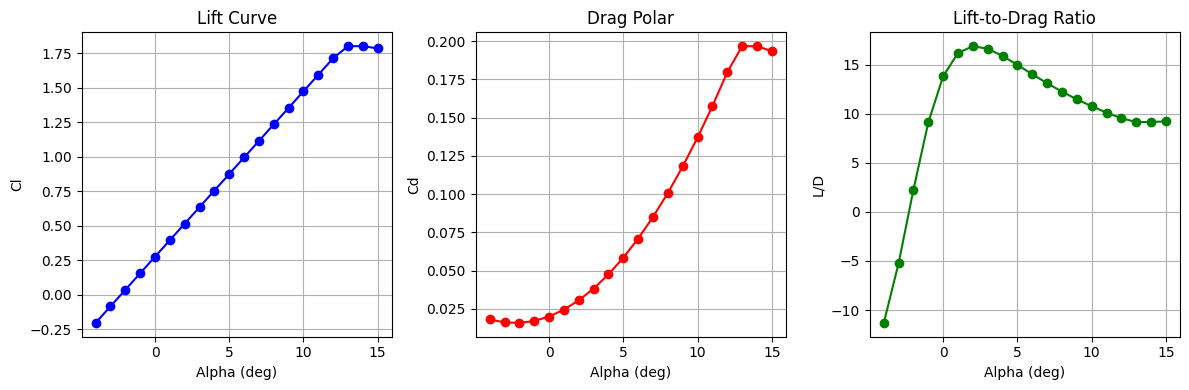

In [4]:
# Run polar sweep
analyzer = get_analyzer()
alphas = list(range(-4, 16))
cls, cds, lds = [], [], []

for alpha in alphas:
    result = analyzer.analyze(0.02, 0.4, 0.12, alpha=alpha)
    cls.append(result['Cl'])
    cds.append(result['Cd'])
    lds.append(result['L/D'])

polar = {'alpha': alphas, 'Cl': cls, 'Cd': cds, 'L/D': lds}

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Cl vs alpha
axes[0].plot(polar['alpha'], polar['Cl'], 'b-o')
axes[0].set_xlabel('Alpha (deg)')
axes[0].set_ylabel('Cl')
axes[0].set_title('Lift Curve')
axes[0].grid(True)

# Cd vs alpha
axes[1].plot(polar['alpha'], polar['Cd'], 'r-o')
axes[1].set_xlabel('Alpha (deg)')
axes[1].set_ylabel('Cd')
axes[1].set_title('Drag Polar')
axes[1].grid(True)

# L/D vs alpha
axes[2].plot(polar['alpha'], polar['L/D'], 'g-o')
axes[2].set_xlabel('Alpha (deg)')
axes[2].set_ylabel('L/D')
axes[2].set_title('Lift-to-Drag Ratio')
axes[2].grid(True)

plt.tight_layout()
plt.show()

## Reynolds Number Study

In [7]:
reynolds_numbers = [1e5, 5e5, 1e6, 3e6]

for re in reynolds_numbers:
    result = analyzer.analyze(0.02, 0.4, 0.12, alpha=4.0, reynolds=re)
    print(f"Re={re:.0e}: Cl={result['Cl']:.4f}, Cd={result['Cd']:.5f}, L/D={result['L/D']:.1f}")

Re=1e+05: Cl=0.7547, Cd=0.05434, L/D=13.9
Re=5e+05: Cl=0.7547, Cd=0.04924, L/D=15.3
Re=1e+06: Cl=0.7547, Cd=0.04750, L/D=15.9
Re=3e+06: Cl=0.7547, Cd=0.04520, L/D=16.7


## Comparison with Published Data

In [6]:
# Abbott & von Doenhoff published data for NACA 2412
published = {
    'cl_alpha': 0.11,  # per degree
    'cd_min': 0.007,
    'clmax': 1.6
}

# Calculate from our polar
idx = polar['alpha'].index(4) - polar['alpha'].index(0)
cl_alpha = (polar['Cl'][polar['alpha'].index(4)] - polar['Cl'][polar['alpha'].index(0)]) / 4
cd_min = min(polar['Cd'])
clmax = max(polar['Cl'])

print(f"Cl_alpha: Published={published['cl_alpha']:.3f}, Computed={cl_alpha:.3f}")
print(f"Cd_min: Published={published['cd_min']:.4f}, Computed={cd_min:.4f}")
print(f"Cl_max: Published={published['clmax']:.2f}, Computed={clmax:.2f}")

Cl_alpha: Published=0.110, Computed=0.120
Cd_min: Published=0.0070, Computed=0.0158
Cl_max: Published=1.60, Computed=1.80
